## Haberman Data EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import seaborn as sns

#### Data file-Haberman

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

#### Load the data 

In [21]:
h_data=pd.read_csv('haberman.csv',header=None)

In [22]:
## Check the first few and last few rows of the data
h_data.head(),h_data.tail()

(    0   1  2  3
 0  30  64  1  1
 1  30  62  3  1
 2  30  65  0  1
 3  31  59  2  1
 4  31  65  4  1,       0   1  2  3
 301  75  62  1  1
 302  76  67  0  1
 303  77  65  3  1
 304  78  65  1  2
 305  83  58  2  2)

###### Variable information
We see that there are no names for the columns.
From the source we know that the columns are Age, Year ,Axil_nodes, Survival Status (1,2).

Attribute Information:
* Age of patient at time of operation (numerical), 
* Patient's year of operation (year - 1900, numerical), 
* Number of positive axillary nodes detected (numerical), 
* Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year

From Wikipedia :

A positive axillary lymph node is a lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.

In [23]:
## Let us rename the columns

columns=['age','year','axil_nodes','survival_status']
h_data.columns=columns
h_data.columns

Index(['age', 'year', 'axil_nodes', 'survival_status'], dtype='object')

In [24]:
## Summary of Data

h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
year               306 non-null int64
axil_nodes         306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


We see that there are a total of 306 observations (rows) of data. All the columns are of type int 64. There are no missing values in any of the columns

###### Goal of Analysis

There is no clear goal mentioned as to whether we jsut want to explore the data or build a classification model to predict the survival status of any patient (I did not find any problem statement on kaggle).
So our goal of analysis would be to explore the data and find variables which are suited for building a predictive model or in general be able explain the survival status of patients

 As our goal is to classify survival status, let's convert survival_status column from numeric to categorical and also map the values 1='survived' and 2='died'. This will help us in our EDA.

In [25]:
# Convert survival status 1='survived', 2='died'

h_data['survival_status']=h_data['survival_status'].astype('str')

h_data['survival_status']=np.where(h_data['survival_status']=='1','survived','died')

In [26]:
h_data.head()

,age,year,axil_nodes,survival_status
0,30,64,1,survived
1,30,62,3,survived
2,30,65,0,survived
3,31,59,2,survived
4,31,65,4,survived


###### summary stats

In [27]:
h_data.describe()

,age,year,axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Some things to notice from summary stats
* Mean age of people is 52 while 75% of people are below 61 years
* Mean axil nodes is 4 while 75% people have axil nodes less than or equal to 4

###### Univariate analysis

In [29]:
## Lets check the distribution of survival status

h_data.survival_status.value_counts()

survived    225
died         81
Name: survival_status, dtype: int64

We see that the survival status is not perfectly balanced but it is not very imbalanced either.

C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


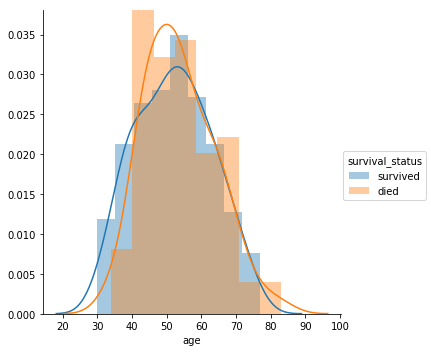

In [34]:
## Lets check distribution of age with survival status

sns.FacetGrid(h_data,hue='survival_status',size=5).map(sns.distplot,'age').add_legend();

plt.show();

C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


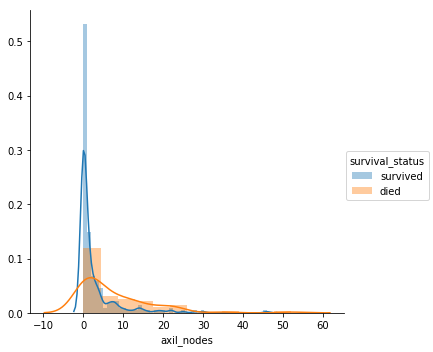

In [35]:
sns.FacetGrid(h_data,hue='survival_status',size=5).map(sns.distplot,'axil_nodes').add_legend();

plt.show();

From the histogams and pdf's we see that age and axil_nodes on their own do not give a good classification of survival status. The overlap is way too much.
For age, we can say that people below 33/34 years have more chance of survival and people above 75 have very less chance of survival.

C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


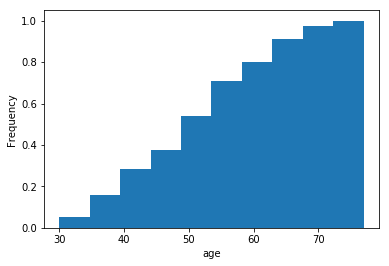

In [46]:
## CDF's for age and axil_nodes for survived patients
h_data_survived=h_data[h_data['survival_status']=='survived']

h_data_survived.age.plot(kind='hist',normed=True,cumulative=True)
plt.xlabel('age')
plt.show()


C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


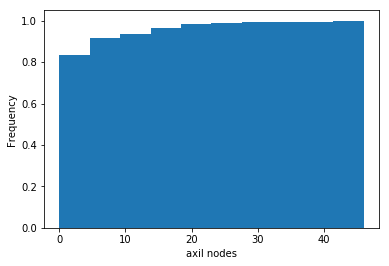

In [48]:
h_data_survived.axil_nodes.plot(kind='hist',normed=True,cumulative=True)
plt.xlabel('axil nodes')
plt.show()

C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


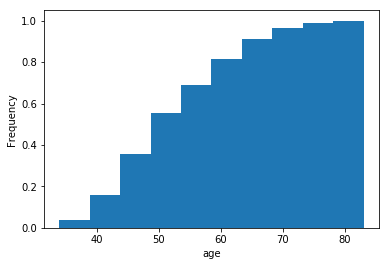

In [49]:
## CDF's for age and axil_nodes for died patients
h_data_died=h_data[h_data['survival_status']=='died']

h_data_died.age.plot(kind='hist',normed=True,cumulative=True)
plt.xlabel('age')
plt.show()

C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


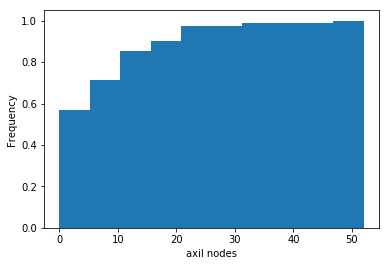

In [50]:
h_data_died.axil_nodes.plot(kind='hist',normed=True,cumulative=True)
plt.xlabel('axil nodes')
plt.show()

From the CDF's of age and axil nodes, we really cannot infer much about the survival status

In [51]:
## Box and Violin Plots

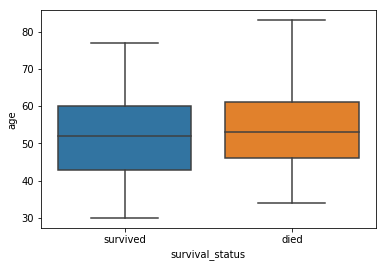

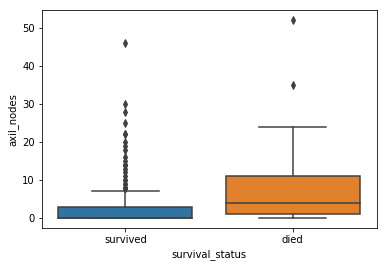

In [58]:
## Box Plot

sns.boxplot(data=h_data,x='survival_status',y='age')
plt.show()
sns.boxplot(data=h_data,x='survival_status',y='axil_nodes')
plt.show()

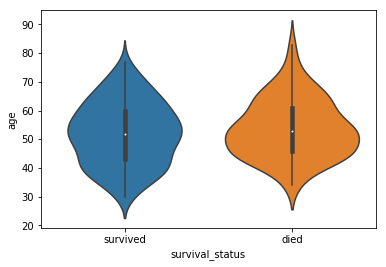

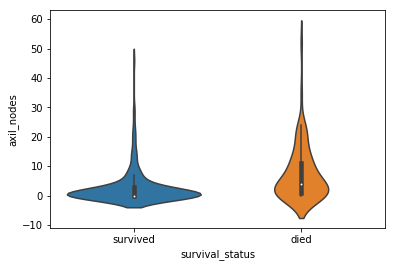

In [59]:
## Violin Plot

sns.violinplot(data=h_data,x='survival_status',y='age')
plt.show()
sns.violinplot(data=h_data,x='survival_status',y='axil_nodes')
plt.show()

* The box plot of age for survived and died is almost identical. We really cannot differantiate the median age of persons who survived  with those who died. Both median ages are in low fifties. Also there are no apparent outliers in age. The distribution of age as seen from the violin plot is also identical for both survived and died.

* The box plot of axil nodes is interesting. We see that the median axil nodes for those who survived is considerably low than those who died. We cannot tell the exact number from the plot but visually inspecting it reveals that it is low (may be 0). Also we see a lot of outliers in axil nodes for both survived and died. For e.g. a lot of people with axil nodes greater than 10 have survived (some even with greater than 30 have survived).

In [61]:
## Let us check the exact median values for axil nodes of survived and died patients

h_data_survived['axil_nodes'].median()

0.0

In [62]:
h_data_died['axil_nodes'].median()

4.0

In [63]:
h_data_died['axil_nodes'].min()

0

We see that the median value of axil nodes for survived patients is 0 while for those who died is 4. Interestingly, for patient who died, the min axil nodes is 0, which indicates that patients with no axil nodes have also died.

###### Bi Variate analysis

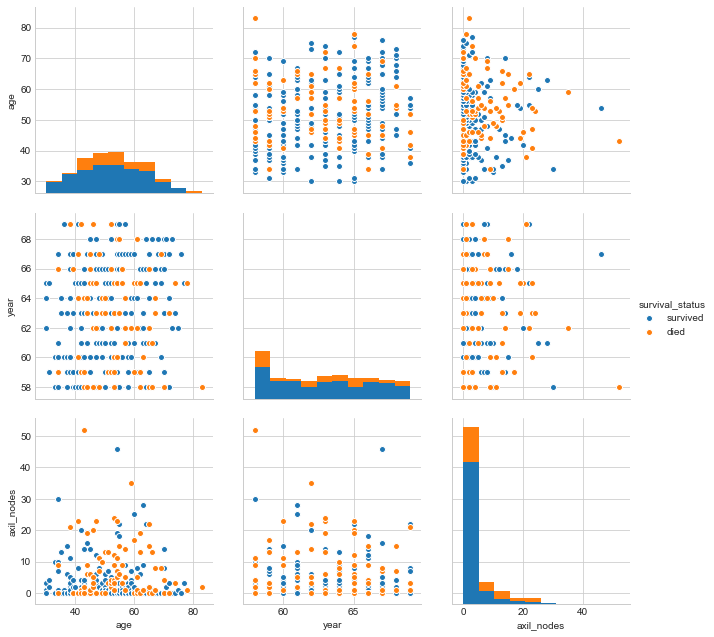

In [66]:
## Pair Plot for age and axil nodes

plt.close();
sns.set_style("whitegrid");
sns.pairplot(h_data[['age','year','axil_nodes','survival_status']], hue="survival_status", size=3);
plt.show()

The pair plots also do not give a clear segmentation of survival status based on age,year of operation or axil nodes.

We also included patient's year of operation here to check if the rate of survival increased in later year of operation due some improvement in healthcare facilities and healthcare technology.

C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gaurav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


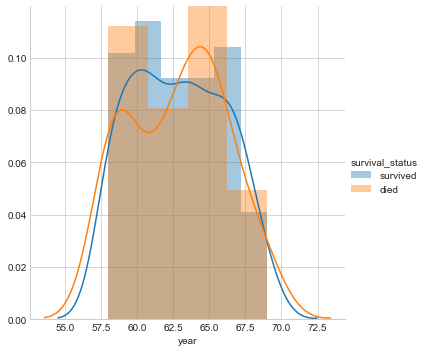

In [67]:
## Lets check distribution of year of operation with survival status

sns.FacetGrid(h_data,hue='survival_status',size=5).map(sns.distplot,'year').add_legend();

plt.show();

###### Conclusion of EDA

* From EDA we see that none of the features are really helpful in classifying survived vs died patients.
* Even the combination of features does not give any clear indication of classifying survived vs died patients.
* Axil Nodes to some extent can be useful and could be the most important feature. We can try to build a model using axil nodes.